In [1]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Taken from StackOverflow
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [5]:
%matplotlib widget

In [10]:
ds = 'AID1949'

Y_TRUE_PATH = f'y_true/{ds}/y_true.npy'
EMBS_3D_PATH_SUM = f'data/{ds}/Sum/embs_3d_umap.npy'
# EMBS_3D_PATH_MEAN = f'data/{ds}/Mean/embs_3d_umap.npy'
# EMBS_3D_PATH_MAX = f'data/{ds}/Max/embs_3d_umap.npy'
EMBS_3D_PATH_DENSE = f'data/{ds}/Dense/embs_3d_umap.npy'
# EMBS_3D_PATH_GRU = f'data/{ds}/GRU/embs_3d_umap.npy'
EMBS_3D_PATH_ST = f'data/{ds}/Set Transformer/embs_3d_umap.npy'

In [13]:
y_true = np.load(Y_TRUE_PATH)
y_true_df = pd.DataFrame(y_true, columns=['SD'])

embs_3d_sum = np.load(EMBS_3D_PATH_SUM)
# embs_3d_mean = np.load(EMBS_3D_PATH_MEAN)
# embs_3d_max = np.load(EMBS_3D_PATH_MAX)
embs_3d_dense = np.load(EMBS_3D_PATH_DENSE)
# embs_3d_gru = np.load(EMBS_3D_PATH_GRU)
embs_3d_st = np.load(EMBS_3D_PATH_ST)

df_sum = pd.DataFrame(embs_3d_sum, columns=['x', 'y', 'z'])
# df_mean = pd.DataFrame(embs_3d_mean, columns=['x', 'y', 'z'])
# df_max = pd.DataFrame(embs_3d_max, columns=['x', 'y', 'z'])
df_dense = pd.DataFrame(embs_3d_dense, columns=['x', 'y', 'z'])
# df_gru = pd.DataFrame(embs_3d_gru, columns=['x', 'y', 'z'])
df_st = pd.DataFrame(embs_3d_st, columns=['x', 'y', 'z'])

### Interactive 3D UMAP plot

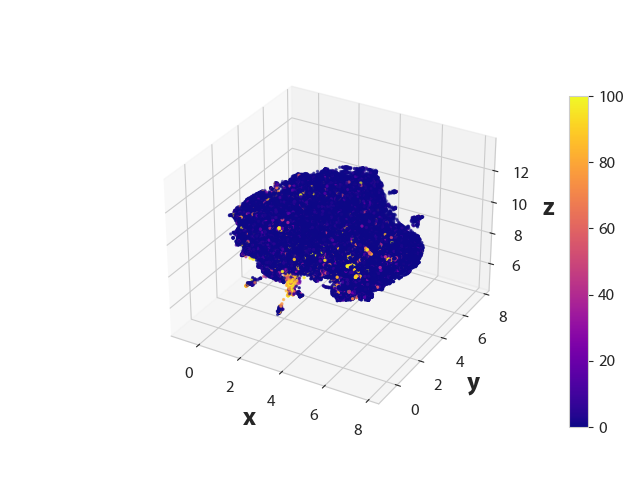

In [16]:
sns.set_style('whitegrid')
mpl.rc('font', family='Myriad Pro')
font = {'family': 'Myriad Pro',
        'weight': 'bold',
        'size': 18,
        }

tickfont = {'family': 'Myriad Pro',
        'weight': 'normal',
        'size': 14,
        }

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Replace with any of the dataframes from above
x = df_dense['x']
y = df_dense['y']
z = df_dense['z']

ax.set_xlabel('x', fontdict=font)
ax.set_ylabel('y', fontdict=font)
ax.set_zlabel('z', fontdict=font)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

p = ax.scatter(x, y, z, cmap=plt.cm.plasma, c=y_true_df['SD'], s=2)

cax = fig.add_axes([ax.get_position().x1 + 0.088, ax.get_position().y0, 0.03, ax.get_position().height - 0.08])

cbar = fig.colorbar(p, cax=cax)

cbar.ax.tick_params(labelsize=12)

set_axes_equal(ax)
plt.show()

In [17]:
print('ax.azim = {}'.format(ax.azim))
print('ax.dist = {}'.format(ax.dist))
print('ax.elev = {}'.format(ax.elev))

ax.azim = -83.86363636363637
ax.dist = 10
ax.elev = -33.311688311688044
